# River incision

## Theory

The detachment limited equation is as follows: Consider a location on a stream channel that has local downstream slope gradient $S$ and drainage area $A$. We define an erosion $E$ as:

$ E = KA^mS^n \tag{1}  $


where $K$ is an erodibility coefficient with dimensions of $[L^{(1-2m)}/T]$. $K$ is thought to be positively correlated with climate wetness, or storminess (this is hard to quantify) and to be negatively correlated with rock strength (again, rock strength is hard to quantify). $A$ is drainage area and $S$ is the slope.  The erosion function has dimensions of erosion (lowering) rate, [L/T]. The expression is also known as the "stream power law" because the exponents can be configured to represent an erosion law that depends on stream power per unit bed area (Whipple & Tucker, 1999). A common choice of exponents is $m=1/2$, $n=1$, but other combinations are possible depending on one's assumptions about process, hydrology, channel geometry, and other factors (e.g., Howard et al., 1994; Whipple et al., 2000).


Rewriting Fluvial incision as a change of elevation in time, we get:

$$  \frac{d z}{d t} = -E $$

or inserting Eq. 1:


$$  \frac{d z}{d t} = -KA^mS^n  \tag{3} $$

Rewriting $S$ as the slope of steepest descent ($-\frac{dz}{dx}$) where $x$ is horizontal distance (positive in the downslope direction) and $z$ is elevation results in the following partial differential equation:

$$  \frac{\partial z}{\partial t} = -KA^m\left(\frac{\partial z}{\partial x}\right)^n  \tag{4} $$

Given this theory, we will run the Stream Power Model to solve some questions and landscape .

This notebook is developed by Benjamin Campforts and builds of notebooks designed CSDMS for the Landlab project. Especially contributions of Gregory Tucker and Nicole Gasparini are valued. See e.g. [here](https://github.com/landlab/landlab/blob/master/notebooks/tutorials/landscape_evolution/smooth_threshold_eroder/stream_power_smooth_threshold_eroder.ipynb) and [here](https://github.com/landlab/landlab/blob/master/notebooks/teaching/geomorphology_exercises/channels_streampower_notebooks/stream_power_channels_class_notebook.ipynb).

Import Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Definition Stream Power Erosion model

In [ ]:
def stream_power_erosion(z,dx,A,total_time,dt =50, U = 1e-3,K =1e-4, m = 0.5, n = 1 ):

  """
  Simulates stream power erosion using a numerical model.

  Args:
      z (numpy.ndarray): Array representing the elevation profile.
      dx (float): Grid spacing (distance between adjacent points).
      A (numpy.ndarray): Array of drainage area values.
      total_time (float): Total simulation time.
      dt (float, optional): Time step for the simulation (default is 100).
      U (float, optional): Uplift rate (default is 1e-3).
      K (float, optional): Erosion coefficient (default is 1e-4).
      m (float, optional): Exponent for drainage area in erosion velocity (default is 0.5).
      n (float, optional): Exponent for slope in erosion velocity (default is 1).

  Returns:
      numpy.ndarray: Updated elevation profile after erosion simulation.

  Notes:
      - The function checks the stability of the provided timestep (dt) based on the incision wave velocity.
      - If the provided dt exceeds the stable timestep, it is adjusted to the maximal stable value.
      - Adjust other parameters as needed to ensure stable simulations.
      - Author: B. Campforts
  """


  # velocity of incision wave
  v = -K*A**m
  # check timestep
  dt_stable = int(0.95*dx/max(abs(v)))
  if dt>dt_stable:
    print(' WARNING '.center(80, '*'))
    print('Timestep provided is too large and will result in model instabilities \nTimestep will be set to the maximal stable timestep of %.02f \nReducing the timestep will incerase model runtime, adjust parameters if required' %dt_stable )
    print(''.center(80, '*'))
    dt = dt_stable


  nt_iterations = int(total_time/dt)
  for t in range(nt_iterations):
    z[:-1] += v[1:]*dt*(abs(z[1:]-z[:-1])/dx)**n
    z[:-1] += U *dt
  return z

An example of how to run the Stream Power Model.
We start by running the model using default parameters.

In [ ]:
# Define spatial parameters of model run (spatial dimensions)
dx = 50.0
x = np.arange(0,10000,dx)
A = x**1.8
z = np.zeros_like(x)
z_ini = np.array(z)

# Model time configuration
total_time = 1e4


# Run de model
z = stream_power_erosion(z, dx,A, total_time)


Can you plot the results? \\
Plot the elvation with respect to distance. \\
Plot both the inital elevation and the modeled elevation at the same plot. \\
HINT: use pyplot plot function. Pyplot was earlier imported as plt. \\
Don't forget to add x and y labels to your plot.

Text(0, 0.5, 'Elevation, m')

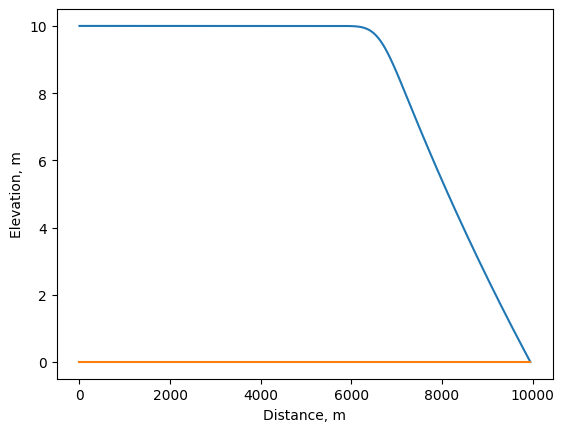

In [ ]:
plt.figure()
plt.plot(x, z)
plt.plot(x, z_ini)
plt.xlabel('Distance, m')
plt.ylabel('Elevation, m')



Now try to run the SPM using a different set of parameter values. \\
Set the uplift rate to U = 0.004 m/yr \\
$K$ to 2 $\times 10^{-4}$ 1/yr \\
$m$ to 0.5 \\
$n$ to 1


Plot the initial conditions, as well as the first and second model results

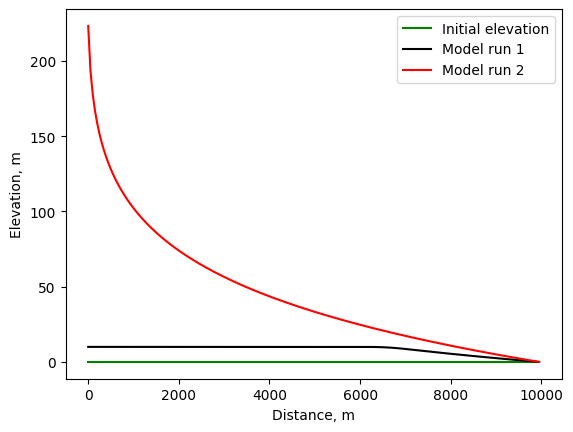

In [ ]:
# Define spatial parameters of model run (spatial dimensions)
dx = 50.0
x = np.arange(0,10000,dx)
A = x**1.8
z2 = np.zeros_like(x)

# Run de model
total_time =2e6
z2 = stream_power_erosion(z2, dx,A, total_time, U = 0.004, K = 2e-4, m= 0.5,n=1)

plt.figure()
plt.plot(x,z_ini,'g', label='Initial elevation')
plt.plot(x,z,'k', label='Model run 1')
plt.plot(x,z2,'r', label='Model run 2')
plt.xlabel('Distance, m')
plt.ylabel('Elevation, m')
plt.legend()

Next, we will plot the slope of the obtained elevation. \\
Think about how to calculate the slope from the varaible $z$ \\
HINT: use pyplot scatter function to plot slope as a function of distance
What happens with this relationship if we plot it on a log-log scale?

Text(0, 0.5, 'Slope, m/m')

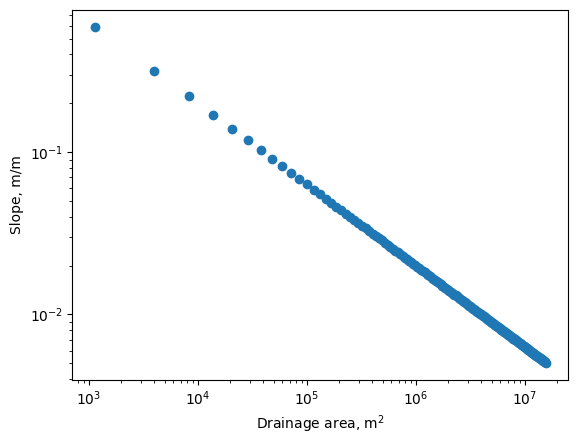

In [ ]:
slope_2 = -(z2[1:]-z2[:-1])/dx
plt.figure()
plt.scatter(A[1:],slope_2)
plt.xlabel('Distance, m')
plt.ylabel('Slope, m/m')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Drainage area, m$^2$')
plt.ylabel('Slope, m/m')

How does this compare to the theoretical values for slope under steady state where Uplift equals erosion?

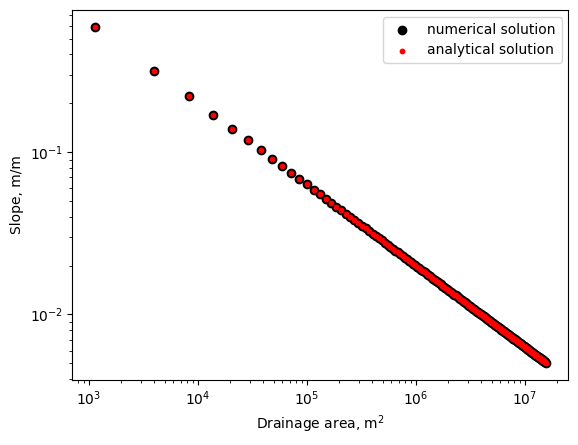

In [ ]:
## Plot Slope
S_an = 0.004/(2e-4*A[1:]**0.5)

plt.scatter(A[1:],slope_2, color = 'k',label = 'numerical solution')
plt.scatter(A[1:], S_an, color = 'r', label = 'analytical solution', s =10)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Drainage area, m$^2$')
plt.ylabel('Slope, m/m')
plt.legend()